# multi-qa-mpnet-base-dot-v1
In this notebook the best performing model for searching in english documents will be inspected more in details 

In [1]:
%reload_ext autoreload
%autoreload 2
import testSearch
from Qdrant import Qdrant
from PdfReader import pdf_to_docVec
from PdfReader import exclude_special_characters
from sentence_transformers import SentenceTransformer
from qdrant_client.http.models import Distance

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
directory_path = 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS'
pdf_paths = testSearch.find_pdf_files(directory_path)

print("PDF Files found:")
for path in pdf_paths:
    print(path)
encoder_multi_qa_mpnet= SentenceTransformer('multi-qa-mpnet-base-dot-v1')

PDF Files found:
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\Thesis\Bachelorarbit_Elsharkawi_577909.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\Uni\HO_Korrektur_2AEO_EN.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\English\Uni\RStPO_3AEO_EN.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\German\chat GPT\Environmental_Conservation_Article_German.pdf
D:\Master\1.Semester\Software\Dataset\PDFS\German\chat GPT\Space_Exploration_Arti

In [6]:
testSearch.encode_dataset(test_name="qa-mpnet-chunked-dot-30", 
                          path='D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', 
                          encoder=encoder_multi_qa_mpnet,
                          distance=Distance.DOT,
                          chunk_size=0,
                          remove_stop_words=False,
                          overlap=30)

user doesn't exist, creating a new collection with the user name: qa-mpnet-chunked-dot-30
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\AI_and_Robotics_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 1 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Environmental_Conservation_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 2 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\Space_Exploration_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 3 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\GPT generated\World_Cuisine_Article.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 4 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\03_SWE-TestDrivenDevelopment.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 6 vectors
D:\Master\1.Semester\Software\Dataset\PDFS\English\PPT\05_SWE-Git-Advanced.pdf
user: qa-mpnet-chunked-dot-30 exists, and has 8 vectors
D:\Master\1.Semester\Sof

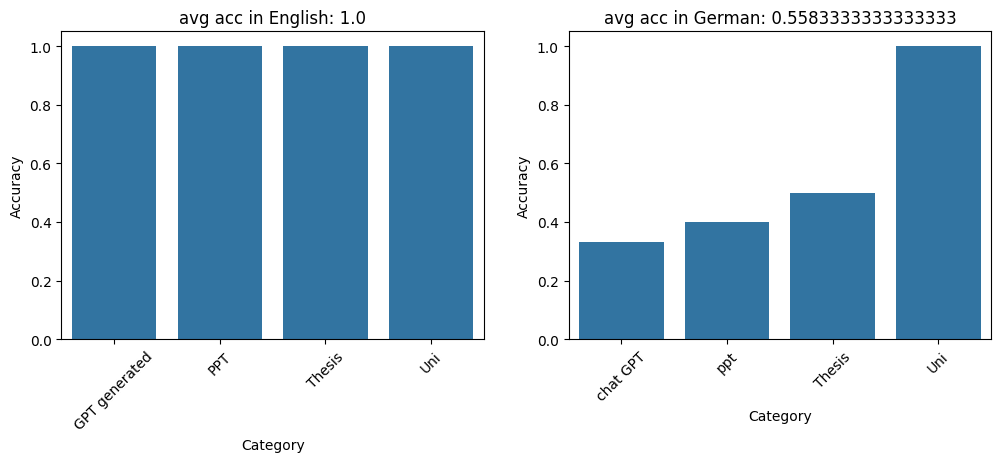

In [7]:
# remove stopwords from question
results = testSearch.test_language_model("qa-mpnet-chunked-dot-30", 'D:\\Master\\1.Semester\\Software\\Dataset\\PDFS', encoder_multi_qa_mpnet)
testSearch.display_acc_per_lang(results, "accuracy_doc")
# 8.1 secs

In [16]:
client = Qdrant(encoder=encoder_multi_qa_mpnet)
german_ppt = testSearch.read_dataset('D:\\Master\\1.Semester\\Software\\Dataset\\PDFS')['English']['Thesis']
for gpt in german_ppt:
    print(f'{gpt}:')
    for qa in german_ppt[gpt]:
        print(f"Q:  {qa['Question']}")
        answers = client.search("qa-mpnet-chunked-dot-30", qa['Question'])
        print(answers)
        # for ans in answers:
        #     print(f"Doc: {ans['source_doc']}")
        #     print(f"Pass: {ans['name']}")


    print('________________________________________________________________________')

Bachelorarbit_Elsharkawi_577909:
Q:  What are the technical specification of the high performance cluster of the KI-Werkstatt?
[{'name': 'Python along with the framework PyTorch. Originally created by Meta AI and now a part of the Linux Foundation, PyTorch is a machine learning framework built on the Torch library and used for applications like computer vision and natural language pro- cessing. Instead of writing all the math require d for training and processing the data manually in Python, PyTorch makes it easier by providing many functions that can be used to make writing ML code easier and faster. It also has some pretrained models, and datasets built in [15]. Two main machines were used in this project to write and execute the code and to collect the data, a PC at XION and the HPC cluster of the KI -Werkstatt. The PC at XION was mainly for collecting the data from the XION ’s archive , disassembling the videos into frames, storing the images in the base directory structure of the 

In [17]:
encoder_multi_qa_mpnet.max_seq_length

512